In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

Wygenerujemy **zbiór danych** złożony z 1000 punktów.

In [ ]:
number_of_points = 1000
x_point = []
y_point = []

In [ ]:
a = 0.22
b = 0.78

In [ ]:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = (a*x+b)+np.random.normal(0.0,0.1)
    x_point.append(x)
    y_point.append(y)

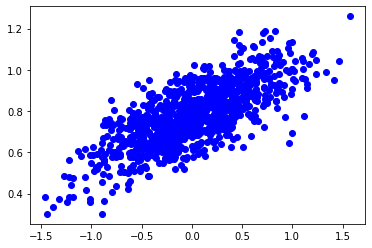

In [ ]:
plt.scatter(x_point,y_point,c='b')
plt.show()

In [ ]:
real_x = np.array(x_point)
real_y = np.array(y_point)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Definiujemy model:

In [ ]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [ ]:
model.add(Dense(units = 1, use_bias=True, input_dim=1, activation = "linear"))

Definiujemy **optymalizator** i **błąd** (średni błąd kwadratowy - MSE). **Współczynnik uczenia = 0.1**

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)

Kompilacja modelu:

In [ ]:
model.compile(loss='MSE',optimizer=opt)

Informacje o modelu:

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Ustalamy **liczbę epok** w czasie której **model będzie uczony**.

In [ ]:
number_epochs=100
mini_batch=300

Proces uczenia: **mini_batch=n** oznacza, że w każdym przejściu pętli treningowej do modyfikacji wag wykorzystywanych jest **n punktów ze zbioru treningowego**. Oczywiście **1<=n<=1000** bo mamy 1000 punktów.

In [ ]:
h = model.fit(real_x,real_y, verbose=0, epochs=number_epochs, batch_size=mini_batch)

In [ ]:
Loss = h.history['loss']

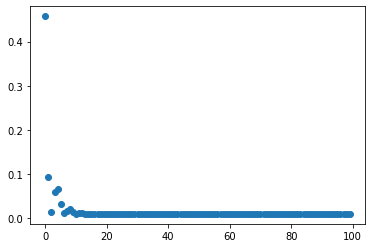

In [ ]:
plt.scatter(np.arange(number_epochs),Loss)
plt.show()